In [1]:
d = 3
D = 12
r = 2
m_1 = 0
X =str(10^9)
PARA = 10

In [2]:
# Parameters
d = 105
D = 105
r = 3
m_1 = 0
h = 4
X = "10^10"
PARA = 100


In [3]:
PRIME_TABLE_SIZE = 10^8
int_X = sage_eval(X)
K.<a> = NumberField(x^2 - d)
co_loglog = float((2^(r-1) - 1)/2 + m_1)
H = K.class_number()
h = K.narrow_class_group().order()
narrow = 0
if (H != h):
    narrow = 1

In [4]:
import struct
import urllib.request
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [5]:
@parallel(PARA)
def plot_points_create(prime_table_segment):
    
    plot_points = []
    
    prime_table_name = 'prime_' + str(prime_table_segment)
    prime_table_target_url = "https://s3ds.mdx.jp/prime_tables/" + prime_table_name
    prime_table_obj = urllib.request.urlopen(prime_table_target_url)
    prime_binary = prime_table_obj.read()  
    table_size = len(prime_binary)/8
    
    prime_tmp = 0
    
    for i in range(0,table_size):
        prime = int.from_bytes(prime_binary[8*i:8*i+8], byteorder='big')  

        if prime_table_segment == 0:
            if prime < 10^4:
                plot_points.append(prime)
                prime_tmp = prime
            else:  
                if (prime - prime_tmp)  > (10^(len(str(prime)) - 2)) :
                    plot_points.append(prime)
                    prime_tmp = prime
        else:
            if (prime - prime_tmp)  > (10^(len(str(prime)) - 3)) :
                plot_points.append(prime)
                prime_tmp = prime
                
        if i == (table_size -1):
            plot_points.append(prime)
    
    return plot_points

In [6]:
plot_points = list(plot_points_create(list(range(0,int_X/PRIME_TABLE_SIZE))))
plot_points.sort()

In [7]:
rp_list = [] 
plot_list_r_p = [[] for i in range(int_X/PRIME_TABLE_SIZE)]

weighted_sum_r_p = 0.0
    
n = 0
    
prime_table_name = 'prime_0'
prime_table_target_url = "https://s3ds.mdx.jp/prime_tables/" + prime_table_name
prime_table_obj = urllib.request.urlopen(prime_table_target_url)
prime_binary = prime_table_obj.read()  
table_size = len(prime_binary)/8
    


for i in range(0,table_size):
    prime = int.from_bytes(prime_binary[8*i:8*i+8], byteorder='big')    
        
    I = K.ideal(prime)
    F = I.factor()
    len_F = len(F)
    ramified = F[0][1]
    norm = F[0][0].absolute_norm()
        
    if (len_F == 1) & (ramified ==1):
        rp_list.append(prime)

prime_table_obj.close()

In [8]:
m = 0
print(len(rp_list), rp_list[0:100])
    
for j in range(0, int_X/PRIME_TABLE_SIZE):
    print(j,m,rp_list[m], len(plot_points[j][1]))
    for k in range(0, len(plot_points[j][1])):
        if rp_list[m]^2 >= plot_points[j][1][k]:
            plot_list_r_p[j].append([plot_points[j][1][k], weighted_sum_r_p])
            if m == (len(plot_points[j][1]) -1):
                break
                
        else:
            while rp_list[m]^2 < plot_points[j][1][k]:
                weighted_sum_r_p = weighted_sum_r_p + float(1/rp_list[m])
                m = m + 1
                if m == (len(plot_points[j][1])):
                    break
            plot_list_r_p[j].append([plot_points[j][1][k], weighted_sum_r_p])

2881350 [11, 17, 19, 29, 31, 37, 43, 47, 61, 67, 71, 83, 127, 139, 149, 163, 167, 173, 179, 181, 191, 193, 199, 227, 229, 239, 241, 257, 271, 277, 281, 293, 337, 349, 353, 359, 373, 383, 389, 401, 409, 431, 439, 449, 457, 463, 467, 487, 491, 503, 547, 563, 569, 587, 593, 599, 601, 613, 619, 641, 647, 659, 661, 673, 677, 691, 701, 757, 769, 773, 797, 809, 811, 821, 823, 829, 857, 859, 877, 883, 887, 907, 911, 967, 983, 1013, 1019, 1021, 1031, 1033, 1039, 1061, 1069, 1087, 1093, 1097, 1117, 1193, 1213, 1217]
0 0 11 1588
1 619 10009 101
2 852 14153 101
3 1017 17359 101
4 1135 20011 101
5 1253 22409 101
6 1362 24499 101
7 1460 26479 101
8 1544 28289 101
9 1629 30011 101
10 1711 31627 11
11 1796 33191 11
12 1864 34667 11
13 1919 36073 11
14 1990 37423 11
15 2052 38767 11
16 2117 40039 11
17 2177 41243 11
18 2236 42437 11
19 2286 43597 11
20 2338 44741 11
21 2387 45827 11
22 2441 46957 11
23 2492 47963 11
24 2534 48991 11
25 2583 50023 11
26 2625 50993 11
27 2672 52009 11
28 2711 52937 11
29

In [9]:
@parallel(PARA)
def list_create(prime_table_segment):
    
    global plot_points, narrow
    
    points = plot_points[prime_table_segment][1]
    
    plot_list = []

    weighted_sum = 0.0
    weighted_sum_spl = 0.0
    weighted_sum_pri = 0.0
    weighted_sum_ramified = 0.0

    
    n = 0
    
    prime_table_name = 'prime_' + str(prime_table_segment)
    prime_table_target_url = "https://s3ds.mdx.jp/prime_tables/" + prime_table_name
    prime_table_obj = urllib.request.urlopen(prime_table_target_url)
    prime_binary = prime_table_obj.read()  
    table_size = len(prime_binary)/8
    


    for i in range(0,table_size):
        prime = int.from_bytes(prime_binary[8*i:8*i+8], byteorder='big')    
        
        I = K.ideal(prime)
        F = I.factor()
        len_F = len(F)
        ramified = F[0][1]
        norm = F[0][0].absolute_norm()
        
        if not ((len_F == 1) & (ramified ==1)):
            weighted_sum = weighted_sum + float(len_F*(1/sqrt(norm)))

        if (len_F > 1) & (ramified ==1) :
            weighted_sum_spl = weighted_sum_spl + float(len_F*(1/sqrt(norm)))
            if F[0][0].is_principal():
                if narrow == 0:
                    weighted_sum_pri = weighted_sum_pri + float(len_F*(1/sqrt(norm)))
                else:
                    conj_list = F[0][0].gens_reduced()[0].galois_conjugates(K)
                    if (conj_list[0]*conj_list[1] > 0):
                        weighted_sum_pri = weighted_sum_pri + float(len_F*(1/sqrt(norm)))
        if (len_F == 1) & (ramified > 1) :
            weighted_sum_ramified = weighted_sum_ramified + float(len_F*(1/sqrt(norm)))
            
        if prime == points[n]:
            weighted_sum_r_p = plot_list_r_p[prime_table_segment][n][1]
            plot_list.append([points[n], weighted_sum, weighted_sum_spl, weighted_sum_pri, weighted_sum_r_p,weighted_sum_ramified])
            n = n + 1
    prime_table_obj.close()
    return(plot_list)

In [10]:
plot_list = list(list_create(list(range(0,int_X/PRIME_TABLE_SIZE))))
plot_list.sort()

In [11]:
offset= [0.0,0.0,0.0,0.0,0.0, 0.0]
for l in range(0,int_X/PRIME_TABLE_SIZE):
    for m in range(0, len(plot_list[l][1])):
        for n in [1 ,2, 3, 5]:
            plot_list[l][1][m][n] = plot_list[l][1][m][n] + offset[n]
    for n in [1 ,2, 3, 5]:
        offset[n] = plot_list[l][1][m][n]

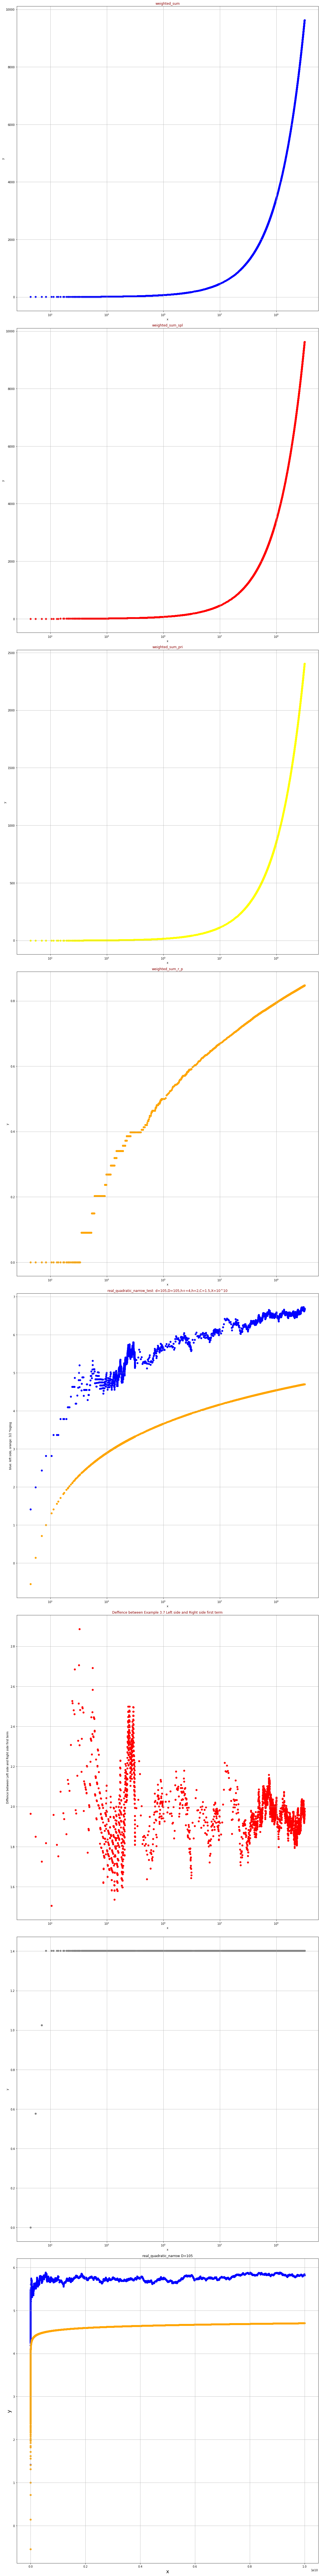

In [12]:
"""
bias against pricipal ideal (real_quadratic_narrow)
"""
import matplotlib.pyplot as plt

fig, ax = plt.subplots(8, 1, tight_layout=True, figsize=(16, 16*8))

plt.xlabel('X',fontsize=18)
plt.ylabel('Y',fontsize=18)
plt.title('real_quadratic_narrow D=' + str(D))

for k in range(8):
    ax[k].set_xscale('log')
    ax[k].grid(which="both") # グリッド表示。"both"はxy軸両
    ax[k].set_xlabel("x")
    ax[k].set_ylabel("y")

ax[7].set_xscale('linear')

ylabel_str = "blue: left side, " + "orange: " + str((2^(r-1) - 1)/2 + m_1) +" *loglog"
ax[4].set_ylabel(ylabel_str)
ax[5].set_ylabel("Diffence between Left side and Right side first term")

ax[0].set_title("weighted_sum", c="darkred", size="large")
ax[1].set_title("weighted_sum_spl", c="darkred", size="large")
ax[2].set_title("weighted_sum_pri", c="darkred", size="large")
ax[3].set_title("weighted_sum_r_p", c="darkred", size="large")
title_str ="real_quadratic_narrow_test: " + "d=" + str(d) + "," + "D=" + str(D) + "," + "h+=" + str(h) + "," + "h=" + str(H) + "," + "C=" + str(co_loglog)  + "," +"X=" + str(X) 
ax[4].set_title(title_str, c="darkred", size="large")
ax[5].set_title("Deffence between Example 3.7 Left side and Right side first term", c="darkred", size="large")

for i in range(0,int_X/PRIME_TABLE_SIZE):
    for j in range(0,len(plot_list[i][1])):
        ax[0].scatter(plot_list[i][1][j][0], plot_list[i][1][j][1], color="blue")
        ax[1].scatter(plot_list[i][1][j][0], plot_list[i][1][j][2], color="red")
        ax[2].scatter(plot_list[i][1][j][0], plot_list[i][1][j][3], color="yellow")
        ax[3].scatter(plot_list[i][1][j][0], plot_list[i][1][j][4], color="orange") 
        ax[4].scatter(plot_list[i][1][j][0], plot_list[i][1][j][1] + plot_list[i][1][j][4] - h*plot_list[i][1][j][3] - h*plot_list[i][1][j][4], color="blue") 
        ax[4].scatter(plot_list[i][1][j][0],  co_loglog*float(log(log(plot_list[i][1][j][0]))), color="orange") 
        ax[5].scatter(plot_list[i][1][j][0], plot_list[i][1][j][1] + plot_list[i][1][j][4]- h*plot_list[i][1][j][3] - h*plot_list[i][1][j][4] - co_loglog*float(log(log(plot_list[i][1][j][0]))) , color="red")
        ax[6].scatter(plot_list[i][1][j][0], plot_list[i][1][j][5] , color="gray")

        ax[7].scatter(plot_list[i][1][j][0], plot_list[i][1][j][1] - h*plot_list[i][1][j][3] - h*plot_list[i][1][j][4], color="blue") 
        ax[7].scatter(plot_list[i][1][j][0],  co_loglog*float(log(log(plot_list[i][1][j][0]))), color="orange") 
        
bbox = ax[4].get_tightbbox(fig.canvas.get_renderer())
file_name = "../output/"+title_str +'.png'
fig.savefig(file_name,dpi=fig.dpi,bbox_inches=bbox.transformed(fig.dpi_scale_trans.inverted()))
    
plt.show()  